In [2]:
%matplotlib inline

In [3]:
import sys
sys.dont_write_bytecode = True
import numpy as np
from vwmClasses import VWMTrial, VWMObj
import matplotlib.pyplot as plt
import pandas as pd
from collections import OrderedDict
import cPickle as pickle
from os.path import expanduser

In [4]:
subj = '0'
run = '1'
behavRun = 'stim1'

In [5]:
homeDirectory = expanduser("~")
saveDirectory = homeDirectory + '/Google Drive/tACS_VWM_ALPHA/data'
pickleFilename = saveDirectory + '/' + behavRun + '/s' + subj + '/setupData/subj' + subj + 'run' + run + '.p'

In [6]:
# Load VWMTrials data structure from setup pickle
VWMTrials = pickle.load(open(pickleFilename, "r" ))

In [7]:
def plotHist(data, x_labels, name):

    freq_series = pd.Series.from_array(data)

    # now to plot the figure...
    plt.figure(figsize=(12, 8))
    ax = freq_series.plot(kind='bar')
    ax.set_title(name)
    ax.set_xlabel("Cond")
    ax.set_ylabel("Trials")
    ax.set_xticklabels(x_labels)

    rects = ax.patches

    # Now make some labels
    labels = [ i for i in data]

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 1, label, ha='center', va='bottom')

In [8]:
checkArray = np.zeros(len(VWMTrials))

In [9]:
hemi = 'left'

In [10]:
hemiCondCount = OrderedDict([('t0d0', 0), ('t0d1', 0), ('t0d2', 0), ('t1d0', 0), ('t1d1', 0), ('t1d2', 0), ('t2d0', 0), ('t2d1', 0), ('t2d2', 0)])
count = 0
for trial in VWMTrials:
    TargCount = 0
    DistCount = 0
    if trial.ChangeTrial == 0 or (trial.ChangeTrial == 1 and trial.Objects[trial.ChangeTargID].hemifield == hemi):
        checkArray[count] = 1
        for obj in trial.Objects:
            if obj.getHemifield() == hemi and obj.objType == 'target':
                TargCount += 1
            elif obj.getHemifield() == hemi and obj.objType == 'distractor':
                DistCount += 1
        condName = 't' + str(TargCount) + 'd' + str(DistCount)
        hemiCondCount[condName] += 1
    count += 1

In [11]:
assert (sum(checkArray) == sum(hemiCondCount.values())), "Number of  hemi conds does not match change trials"

In [12]:
del hemiCondCount['t0d0'] 
del hemiCondCount['t0d1']
del hemiCondCount['t0d2']

In [13]:
hemiCondCount

OrderedDict([('t1d0', 26),
             ('t1d1', 15),
             ('t1d2', 29),
             ('t2d0', 70),
             ('t2d1', 46),
             ('t2d2', 69)])

In [14]:
sum(hemiCondCount.values())

255

In [15]:
x_labels = ['t2d0','t2d2','t2d4','t4d0','t4d2','t4d4']

In [16]:
hemx_labels = ['t1d0','t1d1','t1d2','t2d0','t2d1','t2d2']

In [17]:
nTrialsPerCond       = [44, 96, 44, 50, 84, 50]

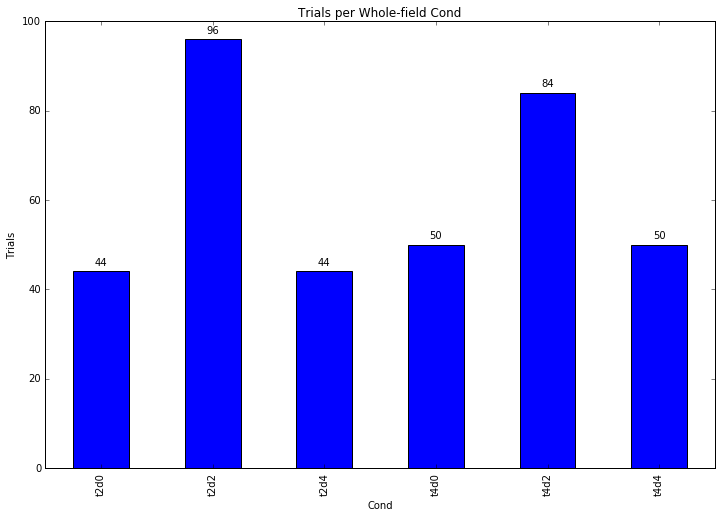

In [18]:
plotHist(nTrialsPerCond, x_labels, 'Trials per Whole-field Cond')

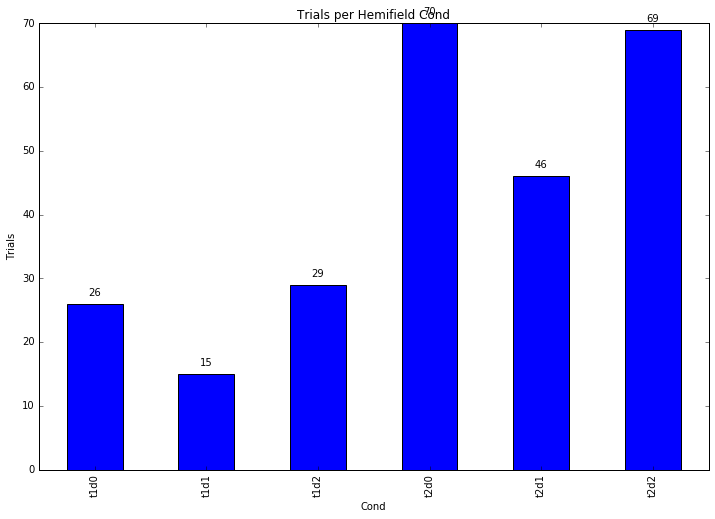

In [19]:
hemiCondHist = hemiCondCount.values()
plotHist(hemiCondHist, hemx_labels, 'Trials per Hemifield Cond')